In [1]:
import numpy as np
import pandas  as pd

import cv2
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
train_df = pd.read_csv('1_Letters_Dataset/emnist-balanced-train.csv')

In [3]:
print(train_df.shape)
train_df.head()

(112799, 785)


,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#1st column of the train and test data is the output.
#0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A', 'B', 'C', 'D', 'E', 15:'F', 'G', 'H', 'I', 'J', 20:'K', 'L', 'M', 
#'N', 'O', 25:'P', 'Q', 'R', 'S', 'T', 30:'U', 'V', 'W', 'X', 'Y', 35:'Z', 'a', 'b', 'd', 'e', 40:'f', 'g', 'h', 'n', 'q', 45:'r', 't'
#These Characters are present in the dataset.
#I will One Hot Encode the output data.

In [5]:
#As in training final testing data in captcha we only have the Upper and Lower Characters so,will remove the char(0-9) from dataset then do OHE.

In [6]:
train_df.rename(columns={'45': 'Output'}, inplace=True)
train_df = train_df[train_df['Output'] > 9]

train_df = train_df.sample(80000)
train_df

,Output,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
15984,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78264,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61624,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44448,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75388,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46525,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16885,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9584,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86975,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.reset_index(drop=True, inplace=True) #To reset index and drop the index column formed.
train_df

,Output,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79996,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79997,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79998,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = train_df.iloc[:,1:]
Y = train_df.iloc[:,:1]

In [9]:
X

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y

,Output
0,20
1,44
2,25
3,23
4,28
...,...
79995,45
79996,12
79997,34
79998,18


In [11]:
Y = pd.get_dummies(Y,columns=['Output'],dtype=int)
Y.head()

,Output_10,Output_11,Output_12,Output_13,Output_14,Output_15,Output_16,Output_17,Output_18,Output_19,...,Output_37,Output_38,Output_39,Output_40,Output_41,Output_42,Output_43,Output_44,Output_45,Output_46
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Output_10  80000 non-null  int32
 1   Output_11  80000 non-null  int32
 2   Output_12  80000 non-null  int32
 3   Output_13  80000 non-null  int32
 4   Output_14  80000 non-null  int32
 5   Output_15  80000 non-null  int32
 6   Output_16  80000 non-null  int32
 7   Output_17  80000 non-null  int32
 8   Output_18  80000 non-null  int32
 9   Output_19  80000 non-null  int32
 10  Output_20  80000 non-null  int32
 11  Output_21  80000 non-null  int32
 12  Output_22  80000 non-null  int32
 13  Output_23  80000 non-null  int32
 14  Output_24  80000 non-null  int32
 15  Output_25  80000 non-null  int32
 16  Output_26  80000 non-null  int32
 17  Output_27  80000 non-null  int32
 18  Output_28  80000 non-null  int32
 19  Output_29  80000 non-null  int32
 20  Output_30  80000 non-null  int32
 21  Output_31  8

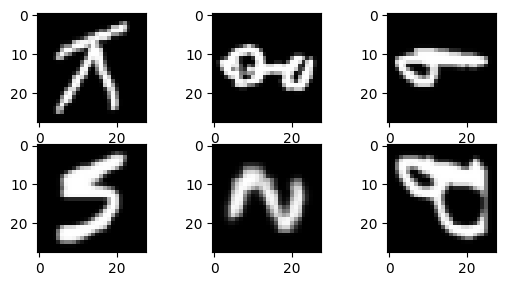

In [13]:
for i in range(0,6):
 plt.subplot(3, 3, i+1)
 plt.imshow(X.iloc[i].values.reshape(28,28),cmap='gray') ## k=1 for 90 degrees anticlockwise
plt.show()

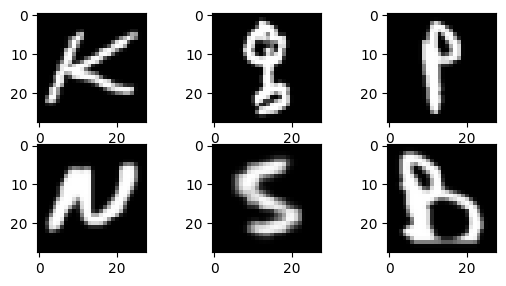

In [14]:
for i in range(0,6):
 plt.subplot(3, 3, i+1)
 plt.imshow(np.transpose(X.iloc[i].values.reshape(28,28)),cmap='gray') ## k=1 for 90 degrees anticlockwise
plt.show()
#Now after transposing our image is in good shape.

In [15]:
#As we can see images are rotated in the dataset ,thus need to rotate by 90 dergees.
def transpose_images(row):
    image = row.values.reshape(28, 28)  # Reshape to 28x28
    transposed_image = np.transpose(image)  # Transpose
    return pd.Series(transposed_image.flatten())
    
X_transposed = X.apply(transpose_images,axis=1)
print(X_transposed.head())

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]


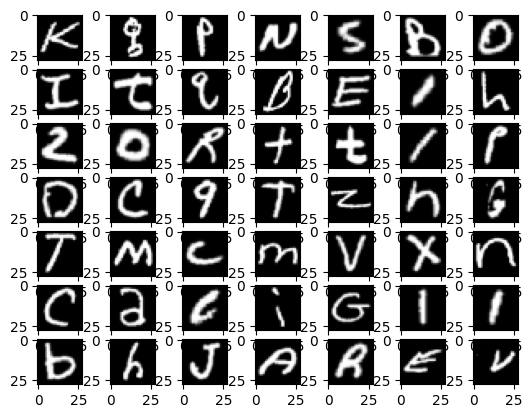

In [16]:
for i in range(0,49):
 plt.subplot(7, 7, i+1) #3row,3col,index=i+1
 plt.imshow(X_transposed.iloc[i].values.reshape(28,28),cmap='gray') ## k=1 for 90 degrees anticlockwise
plt.show()

In [17]:
#Now our dataset is transposed, we will binarize our data.
#def binarize(img, thresh=100):  
#  return tf.where(img > thresh, 255, 0)

#X_binarized = pd.DataFrame(binarize(X_transposed).numpy())

In [18]:
X_binarized = X_transposed

In [19]:
for i in range(0,784):
 print(X_binarized.iloc[0][i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
20
31
0
0
0
0
0
0
0
0
0
0
0
3
21
20
0
0
0
0
0
0
0
0
0
0
0
9
158
183
3
0
0
0
0
0
0
0
0
0
19
84
170
153
2
0
0
0
0
0
0
0
0
6
75
177
246
159
2
0
0
0
0
0
0
1
33
128
188
243
177
108
2
0
0
0
0
0
0
0
0
8
139
254
172
22
0
0
0
0
0
0
3
91
219
254
245
91
9
0
0
0
0
0
0
0
0
0
0
11
141
253
115
4
0
0
0
0
2
22
83
221
253
244
163
9
0
0
0
0
0
0
0
0
0
0
6
162
246
189
20
0
0
0
0
20
159
233
251
221
139
46
7
0
0
0
0
0
0
0
0
0
0
0
16
227
254
129
0
0
0
1
36
128
247
251
232
91
11
0
0
0
0
0
0
0
0
0
0
0
0
0
46
246
251
82
1
8
82
139
243
251
220
83
22
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
132
248
207
31
50
127
232
249
245
208
79
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
82
232
236
151
209
250
253
245
195
36
8
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
85
234
254
251
254
255
236
121
47
1
0
0
0
0
0
0
0


In [20]:
#Now Normalizing the dataset.
X_binarized = (X_binarized/255.0).astype('float64')

In [21]:
for i in range(0,784):
 print(X_binarized.iloc[0][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0784313725490196
0.12156862745098039
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.011764705882352941
0.08235294117647059
0.0784313725490196
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03529411764705882
0.6196078431372549
0.7176470588235294
0.011764705882352941
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07450980392156863
0.32941176470588235
0.6666666666666666
0.6
0.00784313725490196
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.023529411764705882
0.29411764705882354
0.6941176470588235
0.9647058823529412
0.62352941176470

In [22]:
#set=[]
#for i in range(0,100):
# ls=[]
# for j in range(0,784):
#  ls.append(X_binarized.iloc[i][j])
# set.append(ls)
#print(set)

In [23]:
X = X_binarized
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
Y.head()

,Output_10,Output_11,Output_12,Output_13,Output_14,Output_15,Output_16,Output_17,Output_18,Output_19,...,Output_37,Output_38,Output_39,Output_40,Output_41,Output_42,Output_43,Output_44,Output_45,Output_46
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Converting DataFrames to Tensors.
# Convert DataFrame to NumPy array and reshape for TensorFlow
X = X.values.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, height, width, channels(Like RGB Chanels))
Y = Y  # No change needed for labels

In [26]:
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import MaxPooling2D

In [27]:
model=Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization()) 
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization()) 
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(37, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 1, 1, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │              

 Total params: 330,725 (1.26 MB)

 Trainable params: 329,893 (1.26 MB)

 Non-trainable params: 832 (3.25 KB)

In [28]:
data_generator_aug = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images by up to 30 degrees
    validation_split=0.2     # 20% of the data will be used for validation
) #it takes 80%training data and runs.

In [29]:
data_generator = ImageDataGenerator(validation_split=0.2) #Only for split,it takes 20% validation data & uses.

In [30]:
training_data_generator = data_generator_aug.flow(X, Y,batch_size=50, subset='training') #steps_per_epoch=NoOfRowsInData/Batch_Size.
validation_data_generator = data_generator.flow(X, Y,batch_size=50,subset='validation') #Total Data required for training = 69*50*20
history = model.fit(training_data_generator, steps_per_epoch=69, epochs=20, validation_data=validation_data_generator,validation_steps=1)

Epoch 1/20


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 219ms/step - accuracy: 0.0992 - loss: 4.0000 - val_accuracy: 0.0000e+00 - val_loss: 3.5282
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.3669 - loss: 2.2169 - val_accuracy: 0.0200 - val_loss: 3.7866
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.5310 - loss: 1.6274 - val_accuracy: 0.0600 - val_loss: 3.8291
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.6220 - loss: 1.2643 - val_accuracy: 0.2400 - val_loss: 2.8235
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.6685 - loss: 1.1078 - val_accuracy: 0.2200 - val_loss: 2.9323
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - accuracy: 0.7049 - loss: 1.0006 - val_accuracy: 0.4400 - val_loss: 1.7839
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.7048 - loss: 0.9252 - val_accuracy: 0.7200 - val_loss: 0.8548
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.7521 - loss: 0.8273 - val_accuracy: 0

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.8328 - loss: 0.5188 - val_accuracy: 0.8200 - val_loss: 0.8428


Text(0.5, 0, 'epoch')

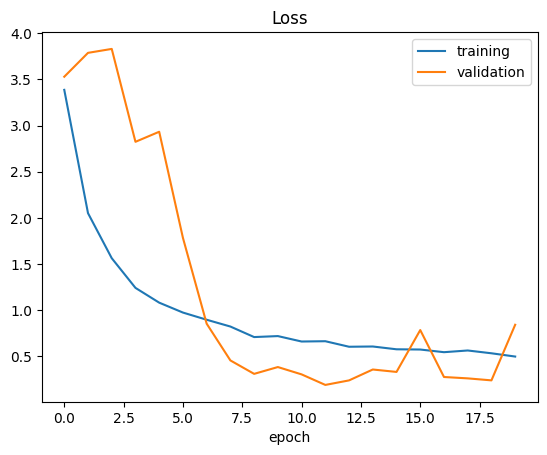

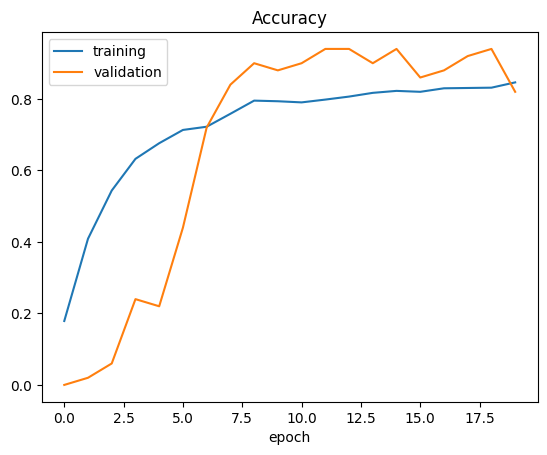

In [32]:
plt.figure(1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training","validation"])
plt.title("Loss")
plt.xlabel("epoch")

plt.figure(2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["training","validation"])
plt.title("Accuracy")
plt.xlabel("epoch")
